In [1]:
import pandas as pd  
import numpy as np   

import matplotlib.pyplot as plt  
import seaborn as sns  

%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 21)
pd.set_option('display.max_rows', 70)

In [2]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\kc_house_data.csv"

In [3]:
# load the training data 
df = pd.read_csv(location)
df.shape

(21613, 21)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [5]:
# check for missing values
df.isnull().values.any()

False

In [6]:
df[["price",
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "sqft_above",
    "yr_built",
    "sqft_living15",
    "sqft_lot15"]].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1788.39,1971.01,1986.55,12768.46
std,367127.20,0.93,0.77,918.44,41420.51,828.09,29.37,685.39,27304.18
min,75000.00,0.00,0.00,290.00,520.00,290.00,1900.00,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1190.00,1951.00,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1560.00,1975.00,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2210.00,1997.00,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,9410.00,2015.00,6210.00,871200.00


Descriptions and names of the columns (features) are given below.

- id
- date: Date house was sold
- price: Price of the sold house
- bedrooms: Number of Bedrooms
- bathrooms: Number of bathrooms
- sqft_living: Square footage of the living space
- sqrt_lot: Square footage of the lot
- floors: Total floors in the house
- waterfront: Whether the house is on a waterfront(1: yes, 0: no)
- view: special view?
- condition: Condition of the house
- grade: unknown
- sqft_above: Square footage of house apart from basement
- sqft_basement: Square footage of the basement
- yr_built: Built year
- yr_renovated: Year when the house was renovated
- zipcode: zipcode of the house
- lat: Latitude coordinate
- long Longitude coordinate
- sqft_living15: Living room area in 2015(implies some renovations)
- sqrt_lot15: Lot area in 2015(implies some renovations)

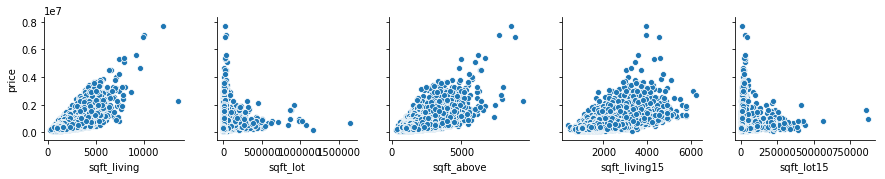

In [7]:
sns.pairplot(data=df, 
             x_vars=['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15'], 
             y_vars=["price"]);

"lot" size is not well correlated to price but the data for living space is reasonable. Visually the best feature to use looks like sqft_living 

In [8]:
df2 = df[["price", "sqft_living"]]
df2.head()

,price,sqft_living
0,221900.00,1180
1,538000.00,2570
2,180000.00,770
3,604000.00,1960
4,510000.00,1680


In [9]:
df["zipcode"].nunique()

70

In [10]:
#df['zipcode'].value_counts()

In [11]:
# group by zipcode and compute the mean of prices in a zipcode
df.groupby('zipcode')['price'].mean()  

zipcode
98001    280804.69
98002    234284.04
98003    294111.28
98004   1355927.08
98005    810164.88
98006    859684.78
98007    617105.09
98008    645507.38
98010    423665.99
98011    490351.47
98014    455617.11
98019    424788.75
98022    315709.30
98023    286732.79
98024    580526.79
98027    616990.59
98028    462480.04
98029    612653.61
98030    296187.98
98031    300539.89
98032    251296.24
98033    803719.52
98034    521652.86
98038    366867.60
98039   2160606.60
98040   1194230.02
98042    311632.11
98045    439471.08
98052    645231.46
98053    678163.06
98055    304262.11
98056    420890.55
98058    353608.64
98059    493552.53
98065    527961.20
98070    487479.63
98072    569958.47
98074    685605.78
98075    790576.65
98077    682774.88
98092    334921.06
98102    901258.27
98103    584919.21
98105    862825.23
98106    319581.39
98107    579053.42
98108    355678.52
98109    879623.62
98112   1095499.34
98115    619900.55
98116    618634.17
98117    576795.01
9811

Text(0.5,1,'a0=2, a1=2  (a0=2 moves line up)')

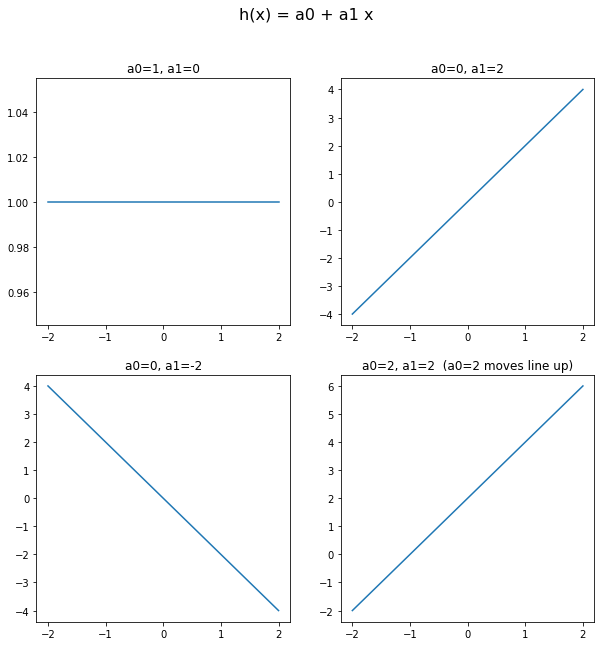

In [12]:
x = np.linspace(-2, 2, 10)

plt.figure(1, figsize=(10,10)); 
plt.suptitle('h(x) = a0 + a1 x', fontsize=16)

plt.subplot(221); plt.plot(x, 1 + 0*x ); plt.title('a0=1, a1=0')
plt.subplot(222); plt.plot(x, 0 + 2*x ); plt.title('a0=0, a1=2')
plt.subplot(223); plt.plot(x, 0 - 2*x ); plt.title('a0=0, a1=-2')
plt.subplot(224); plt.plot(x, 2 + 2*x ); plt.title('a0=2, a1=2  (a0=2 moves line up)')

#### Find parameters for a model function that minimizes the error between values predicted by the model and those know from the training set.

In [13]:
# some simple random (close to linear) data
x = np.linspace(0, 5, 5)

#y = np.linspace(0,5,5) + 1 + np.random.randn(5)
y = [ 0.21378624, 1.97217916, 2.36737375, 5.13718724, 6.26470731]

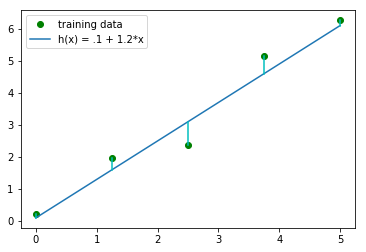

In [14]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, .1 + 1.2*x, label='h(x) = .1 + 1.2*x')

for i in range(len(x)):
    ax.plot([x[i], x[i]], [.1 + 1.2*x[i],y[i]], '-', color='c')
    
plt.legend();

# Visualize the Cost Function

#### the SSE equation is
$ SSE(\beta_0, \beta_1) = \sum_{i=1}^{n}(y_i - \beta_0 - \beta_j{x_i})^2$ 

SSE is a sum of squares, a second order polynomial equation. 

That means that it is parabolic.If we set $\beta_0$ = 0 (or some other constant value) and just look at SSE as a function of $\beta_1$ then it is a simple parabola with an obvious minimum.

In [15]:
# The function SSE
def SSE(a0, a1, x, y, m):
    SSE = 0
    for i in range(m):
        SSE += ((a0 + a1*x[i]) - y[i] )**2
        
    return SSE

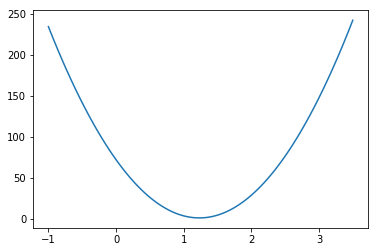

In [16]:
a = np.linspace(-1, 3.5, 100)

# set a0 to 0.1
plt.plot(a, SSE(0.1, a, x, y, m=len(x)) ) ;

- plot the test data 
- with a set of lines for a range of values of a1 and 
- set a0=0.1. 

- Following that will be those values plotted with SSE(a0, a1) (the values of the sums of the squared errors for each line).

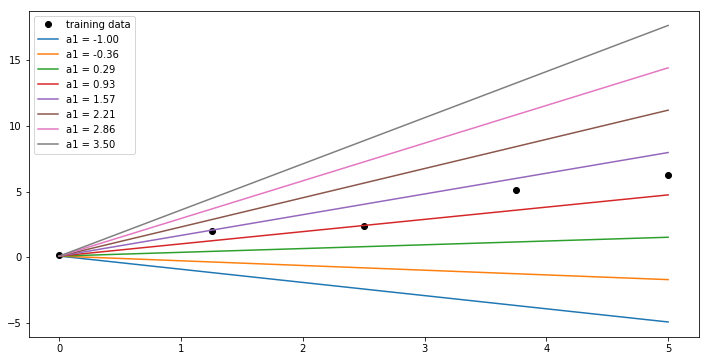

In [17]:
fig, ax = plt.subplots()

ax.figure.set_size_inches(12, 6)

# plot the training data
ax.plot(x, y, 'o', color='k', label='training data')

a1 = np.linspace(-1, 3.5, 8)

for i in range(len(a1)):
    ax.plot(x, .1 + a1[i]*x, label='a1 = %.2f' %a1[i] )

plt.legend();

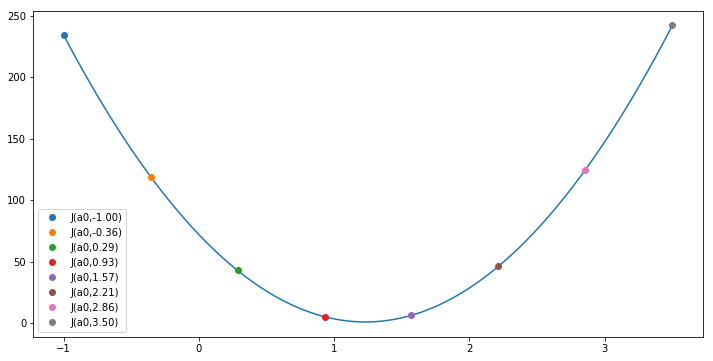

In [18]:
fig, ax = plt.subplots()

ax.figure.set_size_inches(12, 6)

a = np.linspace(-1, 3.5, 100)

ax.plot(a, SSE(0.1, a, x, y, m=len(x)), c='C0')

for i in range(len(a1)):
    ax.plot(a1[i], SSE(0.1,a1[i],x,y,m=len(x)), 'o', label='J(a0,%.2f)' %a1[i])
    
plt.legend();

You can see that the (a1=1.57) and (a1=0.93) lines are closest to the minimum.

In the plots above we set the variable a0 to a constant, 0.1, so that we could make a 2-d plot. 

To see what SSE(a0, a1) looks like when both a0 and a1 change we can look at 3-d plots. 

The dimension variables are a0, a1 and SSE(a0,a1). 

2 ways to make 3-d plots are 
- surface, 
- contour plots.

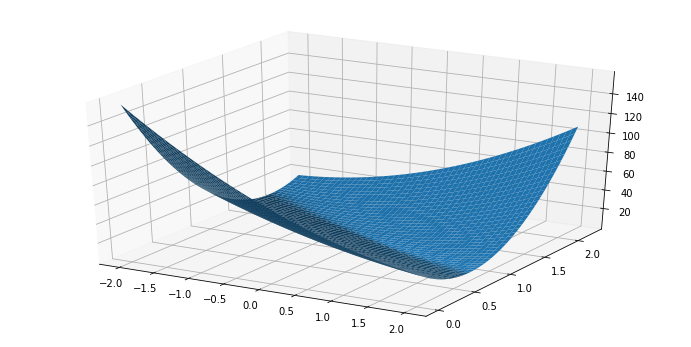

In [26]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(1,1,1, projection='3d')

a0 = np.linspace(-2, 2, 1000)
a1 = np.linspace(0,2.2, 1000)

aa0, aa1 = np.meshgrid(a0, a1)

ax.figure.set_size_inches(12, 6)

ax.plot_surface(aa0, aa1, SSE(aa0, aa1, x, y, m=len(x)));
#ax.view_init(45,35)

#### Contour plots

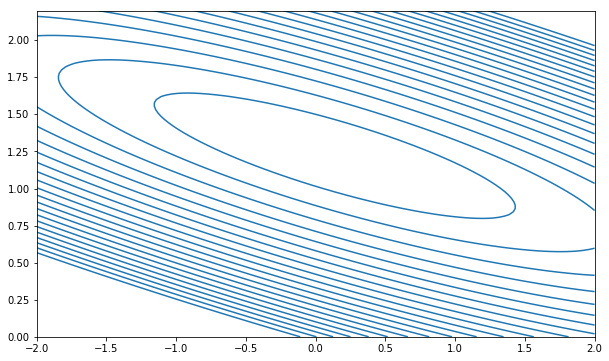

In [24]:
a0 = np.linspace(-2,2, 100)
a1 = np.linspace(0,2.2, 100)

#J(aa0,aa1,x,y,m=len(x))

aa0, aa1 = np.meshgrid(a0, a1)
plt.figure(figsize=(10, 6))

plt.contour(aa0, aa1, SSE(aa0,aa1,x,y,m=len(x)) , colors='C0', levels=[i for i in np.arange(0, 80, 3.75)])

1. The center of that that smallest ring is where the minimum of SSE is.